<a href="https://colab.research.google.com/github/PanchitaWallatri/ML/blob/main/ml_week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras import Input
from keras import layers
from keras.layers import Flatten, Dense ,Embedding
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_R = pd.read_csv('/content/ratings.csv')
df_M = pd.read_csv('/content/movies.csv')

In [ ]:
df_R

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
209842,1481,586,2.5,1357831772
209843,1481,587,3.0,1358430669
209844,1481,588,1.0,1357831561
209845,1481,589,3.5,1357831524


In [ ]:
df_M

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [ ]:
df_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
df = pd.merge(df_R,df_M,how= 'left',on = 'movieId')

In [ ]:
df

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,1147878820,Underground (1995),Comedy|Drama|War
4,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance
...,...,...,...,...,...,...
209842,1481,586,2.5,1357831772,Home Alone (1990),Children|Comedy
209843,1481,587,3.0,1358430669,Ghost (1990),Comedy|Drama|Fantasy|Romance|Thriller
209844,1481,588,1.0,1357831561,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
209845,1481,589,3.5,1357831524,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [ ]:
df.describe()

,userId,movieId,rating,timestamp
count,209847.000000,209847.000000,209847.000000,2.098470e+05
mean,764.365442,20403.876062,3.567278,1.204242e+09
std,420.234064,38310.970674,1.047547,2.364521e+08
min,1.000000,1.000000,0.500000,1.357000e+03
25%,426.000000,1094.000000,3.000000,9.826217e+08
50%,800.000000,2716.000000,4.000000,1.171785e+09
75%,1123.000000,7438.000000,4.000000,1.446936e+09
max,1481.000000,208002.000000,5.000000,1.574254e+09


In [ ]:
df.isnull().sum().sum()

0

แก้ตรงนำข้อมูลเข้าให้น้อยลง

In [ ]:
df_train, df_val = train_test_split(df, train_size=0.7, stratify=df['rating'],random_state= 42)

In [ ]:
df_train

,userId,movieId,rating,timestamp,title,genres
208959,1478,8042,5.0,1331498180,Mean Streets (1973),Crime|Drama
179364,1277,2890,5.0,941445014,Three Kings (1999),Action|Adventure|Comedy|Drama|War
88350,662,4027,4.0,992707928,"O Brother, Where Art Thou? (2000)",Adventure|Comedy|Crime
27102,207,32587,3.5,1244229834,Sin City (2005),Action|Crime|Film-Noir|Mystery|Thriller
32131,243,2085,2.0,1464280446,101 Dalmatians (One Hundred and One Dalmatians...,Adventure|Animation|Children
...,...,...,...,...,...,...
58401,462,153,3.0,1138574815,Batman Forever (1995),Action|Adventure|Comedy|Crime
209188,1480,1251,3.5,1566332873,8 1/2 (8½) (1963),Drama|Fantasy
97906,741,597,5.0,1262231830,Pretty Woman (1990),Comedy|Romance
154108,1089,4784,3.0,1031597094,"French Lieutenant's Woman, The (1981)",Drama


In [ ]:
df_val

,userId,movieId,rating,timestamp,title,genres
13236,100,17,4.0,862168376,Sense and Sensibility (1995),Drama|Romance
190578,1356,1354,4.0,956601160,Breaking the Waves (1996),Drama|Mystery
57188,450,78218,0.5,1439794186,Unthinkable (2010),Drama|Thriller
72778,561,344,5.0,966805947,Ace Ventura: Pet Detective (1994),Comedy
20989,171,1333,4.5,1074593102,"Birds, The (1963)",Horror|Thriller
...,...,...,...,...,...,...
14606,113,112290,3.0,1467070912,Boyhood (2014),Drama
72606,559,671,4.0,850697704,Mystery Science Theater 3000: The Movie (1996),Comedy|Sci-Fi
83489,628,101864,4.0,1480626587,Oblivion (2013),Action|Adventure|Sci-Fi|IMAX
22462,175,4351,3.0,992234824,Point Break (1991),Action|Crime|Thriller


In [ ]:
# Re-numbering userId ( to eliminate skipping id)
userId_list = df['userId'].unique()
index = 0
dict_users= {}
for ids in sorted(userId_list):
    dict_users[ids] = index
    index += 1

In [ ]:
dict_users

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [ ]:
movieId_list = df['movieId'].unique()
index = 0
dict_movies= {}
for ids in sorted(movieId_list):
    dict_movies[ids] = index
    index += 1

In [ ]:
len(dict_users)

1481

In [ ]:
len(dict_movies)

13081

In [ ]:
df_train["userId"] = df_train["userId"].map(dict_users)
df_val['userId'] = df_val['userId'].map(dict_users)
df_train["movieId"] = df_train["movieId"].map(dict_movies)
df_val['movieId'] = df_val['movieId'].map(dict_movies)

In [ ]:
df_train

,userId,movieId,rating,timestamp,title,genres
208959,1477,5809,5.0,1331498180,Mean Streets (1973),Crime|Drama
179364,1276,2460,5.0,941445014,Three Kings (1999),Action|Adventure|Comedy|Drama|War
88350,661,3370,4.0,992707928,"O Brother, Where Art Thou? (2000)",Adventure|Comedy|Crime
27102,206,6794,3.5,1244229834,Sin City (2005),Action|Crime|Film-Noir|Mystery|Thriller
32131,242,1765,2.0,1464280446,101 Dalmatians (One Hundred and One Dalmatians...,Adventure|Animation|Children
...,...,...,...,...,...,...
58401,461,140,3.0,1138574815,Batman Forever (1995),Action|Adventure|Comedy|Crime
209188,1479,1082,3.5,1566332873,8 1/2 (8½) (1963),Drama|Fantasy
97906,740,551,5.0,1262231830,Pretty Woman (1990),Comedy|Romance
154108,1088,3941,3.0,1031597094,"French Lieutenant's Woman, The (1981)",Drama


In [ ]:
# Create Model NCF
EMBEDDING_SIZE=100
users_input = Input(shape=(1,), name="users_input")
users_embedding = Embedding(len(userId_list) + 1, EMBEDDING_SIZE,name="users_embeddings")(users_input)
users_bias = Embedding(len(userId_list) + 1, 1, name="users_bias")(users_input)
movies_input = Input(shape=(1,), name="movies_input")
movies_embedding = Embedding(len(movieId_list) + 1, EMBEDDING_SIZE,name="movies_embeddings")(movies_input)
movies_bias = Embedding(len(movieId_list) + 1, 1, name="movies_bias")(movies_input)
dot_product_users_movies = tf.math.multiply(users_embedding, movies_embedding)
input_terms = dot_product_users_movies + users_bias + movies_bias
input_terms = Flatten(name="fl_inputs")(input_terms)
output = Dense(1, activation="relu", name="output")(input_terms)
model = Model(inputs=[users_input, movies_input], outputs=output)
opt_adam = Adam(lr = 0.005)
model.compile(optimizer=opt_adam, loss= ['mse'], metrics=['mean_absolute_error'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 users_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 movies_input (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 users_embeddings (Embedding)   (None, 1, 100)       148200      ['users_input[0][0]']            
                                                                                                  
 movies_embeddings (Embedding)  (None, 1, 100)       1308200     ['movies_input[0][0]']           
                                                                                              

In [ ]:
# ------------ Training Model -------------------------------
BS = [512, 1024, 2048] # [64, 128, 256, 512, 1024, 2048]  try at least 3 values
EP = [10, 20, 60 ] # [5, 10, 20, 50, 60 ]  try at least 3 values
history = model.fit(
x=[df_train.userId, df_train.movieId],
y=df_train.rating,
batch_size=2048,
epochs=80,
verbose=1,
validation_data=([df_val.userId, df_val.movieId], df_val.rating))

Epoch 1/80
72/72 [==============================] - 6s 49ms/step - loss: 4.2892 - mean_absolute_error: 1.5984 - val_loss: 0.9265 - val_mean_absolute_error: 0.7430
Epoch 2/80
72/72 [==============================] - 2s 22ms/step - loss: 0.7850 - mean_absolute_error: 0.6823 - val_loss: 0.8282 - val_mean_absolute_error: 0.7009
Epoch 3/80
72/72 [==============================] - 2s 23ms/step - loss: 0.6633 - mean_absolute_error: 0.6222 - val_loss: 0.8031 - val_mean_absolute_error: 0.6872
Epoch 4/80
72/72 [==============================] - 2s 23ms/step - loss: 0.5144 - mean_absolute_error: 0.5417 - val_loss: 0.7909 - val_mean_absolute_error: 0.6812
Epoch 5/80
72/72 [==============================] - 2s 26ms/step - loss: 0.3641 - mean_absolute_error: 0.4523 - val_loss: 0.8021 - val_mean_absolute_error: 0.6871
Epoch 6/80
72/72 [==============================] - 2s 23ms/step - loss: 0.2515 - mean_absolute_error: 0.3747 - val_loss: 0.8230 - val_mean_absolute_error: 0.6973
Epoch 7/80
72/72 [====

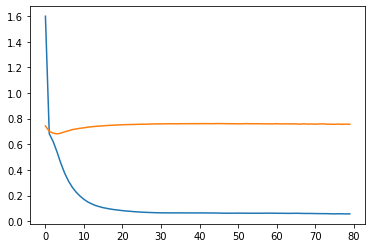

In [ ]:
plt.plot(history.history["mean_absolute_error"])
plt.plot(history.history["val_mean_absolute_error"])

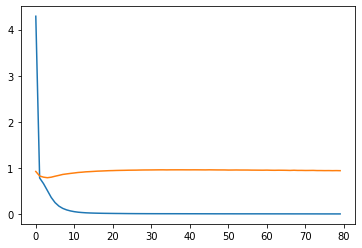

In [ ]:
#MSE = 
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [ ]:
userPredictR = pd.DataFrame(model.predict([df_val['userId'], df_val['movieId']]))
userPredictR 

1968/1968 [==============================] - 3s 1ms/step


,0
0,3.534457
1,4.226667
2,2.880333
3,4.382743
4,4.101700
...,...
62950,3.646585
62951,3.730680
62952,3.532768
62953,4.122637


case 2

In [ ]:
# ------------ Training Model -------------------------------
BS = [512, 1024, 2048] # [64, 128, 256, 512, 1024, 2048]  try at least 3 values
EP = [10, 20, 60 ] # [5, 10, 20, 50, 60 ]  try at least 3 values
history = model.fit(
x=[df_train.userId, df_train.movieId],
y=df_train.rating,
batch_size=2048,
epochs=60,
verbose=1,
validation_data=([df_val.userId, df_val.movieId], df_val.rating))

Epoch 1/60
72/72 [==============================] - 2s 25ms/step - loss: 0.0068 - mean_absolute_error: 0.0590 - val_loss: 0.9397 - val_mean_absolute_error: 0.7542
Epoch 2/60
72/72 [==============================] - 2s 23ms/step - loss: 0.0067 - mean_absolute_error: 0.0588 - val_loss: 0.9417 - val_mean_absolute_error: 0.7552
Epoch 3/60
72/72 [==============================] - 2s 23ms/step - loss: 0.0066 - mean_absolute_error: 0.0583 - val_loss: 0.9402 - val_mean_absolute_error: 0.7550
Epoch 4/60
72/72 [==============================] - 2s 23ms/step - loss: 0.0065 - mean_absolute_error: 0.0581 - val_loss: 0.9406 - val_mean_absolute_error: 0.7555
Epoch 5/60
72/72 [==============================] - 2s 24ms/step - loss: 0.0065 - mean_absolute_error: 0.0579 - val_loss: 0.9390 - val_mean_absolute_error: 0.7545
Epoch 6/60
72/72 [==============================] - 2s 23ms/step - loss: 0.0066 - mean_absolute_error: 0.0592 - val_loss: 0.9443 - val_mean_absolute_error: 0.7583
Epoch 7/60
72/72 [====

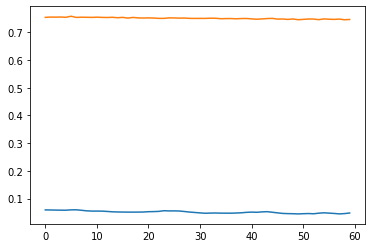

In [ ]:
plt.plot(history.history["mean_absolute_error"])
plt.plot(history.history["val_mean_absolute_error"])

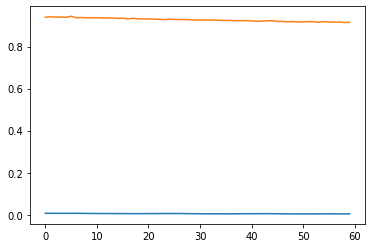

In [ ]:
#MSE = 
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [ ]:
userPredictR = pd.DataFrame(model.predict([df_val['userId'], df_val['movieId']]))
userPredictR 

1968/1968 [==============================] - 3s 1ms/step


,0
0,3.510453
1,4.041669
2,2.772748
3,4.086097
4,4.094243
...,...
62950,3.618234
62951,3.714275
62952,3.478482
62953,4.033216


case 3


In [ ]:
# ------------ Training Model -------------------------------
BS = [512, 1024, 2048] # [64, 128, 256, 512, 1024, 2048]  try at least 3 values
EP = [10, 20, 60 ] # [5, 10, 20, 50, 60 ]  try at least 3 values
history = model.fit(
x=[df_train.userId, df_train.movieId],
y=df_train.rating,
batch_size=2048,
epochs=120,
verbose=1,
validation_data=([df_val.userId, df_val.movieId], df_val.rating))

Epoch 1/120
72/72 [==============================] - 2s 32ms/step - loss: 0.0040 - mean_absolute_error: 0.0468 - val_loss: 0.9146 - val_mean_absolute_error: 0.7464
Epoch 2/120
72/72 [==============================] - 2s 27ms/step - loss: 0.0039 - mean_absolute_error: 0.0464 - val_loss: 0.9157 - val_mean_absolute_error: 0.7470
Epoch 3/120
72/72 [==============================] - 2s 27ms/step - loss: 0.0039 - mean_absolute_error: 0.0458 - val_loss: 0.9125 - val_mean_absolute_error: 0.7447
Epoch 4/120
72/72 [==============================] - 2s 29ms/step - loss: 0.0037 - mean_absolute_error: 0.0452 - val_loss: 0.9130 - val_mean_absolute_error: 0.7454
Epoch 5/120
72/72 [==============================] - 2s 25ms/step - loss: 0.0036 - mean_absolute_error: 0.0441 - val_loss: 0.9143 - val_mean_absolute_error: 0.7467
Epoch 6/120
72/72 [==============================] - 2s 23ms/step - loss: 0.0034 - mean_absolute_error: 0.0426 - val_loss: 0.9124 - val_mean_absolute_error: 0.7452
Epoch 7/120
72/7

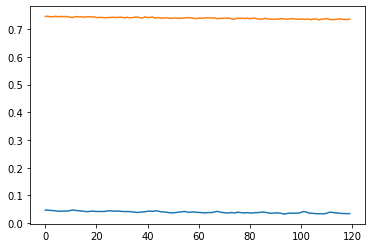

In [ ]:
plt.plot(history.history["mean_absolute_error"])
plt.plot(history.history["val_mean_absolute_error"])

In [ ]:
plt.plot(history.history["mean_absolute_error"])
plt.plot(history.history["val_mean_absolute_error"])

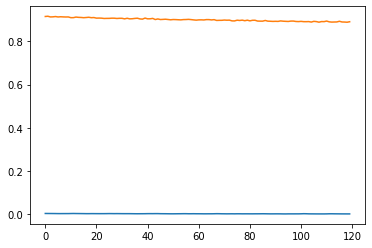

In [ ]:
#MSE = 
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [ ]:
userPredictR = pd.DataFrame(model.predict([df_val['userId'], df_val['movieId']]))
userPredictR 

1968/1968 [==============================] - 3s 1ms/step


,0
0,3.488730
1,3.969098
2,2.803610
3,3.888722
4,4.147168
...,...
62950,3.522105
62951,3.689035
62952,3.460513
62953,3.951100
